In [1]:
import numpy as np
import pandas as pd 

testing_letter = pd.read_csv('./emnist_encoded_test.csv')
training_letter = pd.read_csv('./emnist_encoded_train.csv')


Arbi found the dataset, analysed it.
I performed one-hot encoding, normalisation of the data.
Algorithm is jointly developed and is yet to be improved. (in terms of accuracy)

In [2]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 810)
(14799, 803)


In [3]:
training_letter.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#training_letters
y1 = np.array(training_letter.iloc[:,:26].values) ## The first 26 columns correspond one-hot-encoded to labels
x1 = np.array(training_letter.iloc[:,26:].values) ## All the other columns correspond to pixel values for each 28x28 image , to know the amount of images  
#testing_letters                          ## in front of each label, we have 784 values in a row, which correspond to pixels in a single image of that label
y2 = np.array(testing_letter.iloc[:,:19].values)  ## LABELS 
x2 = np.array(testing_letter.iloc[:,19:].values)
print(y1.shape)
print(x1.shape)

(88799, 26)
(88799, 784)


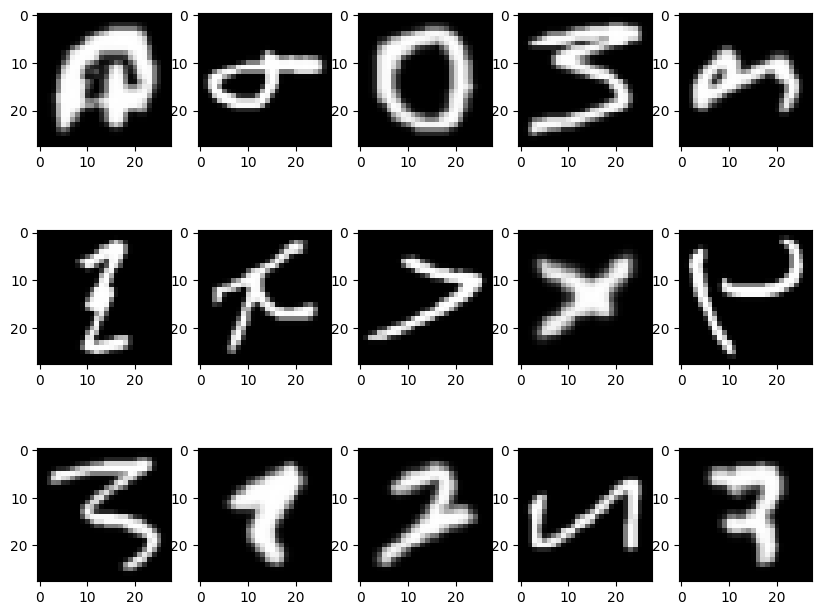

In [3]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]), cmap='gray')

Normalisation of data and reshaping 

In [4]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)
print(train_images.shape)


test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)
print(test_images.shape)

(88799, 28, 28, 1)
(14799, 28, 28, 1)


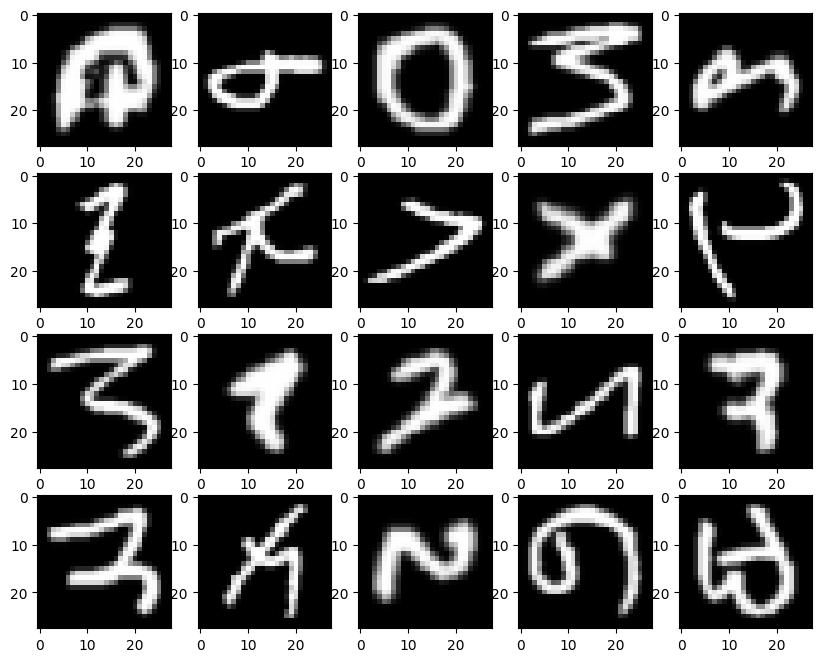

In [45]:
fig,axes = plt.subplots(4,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
                                ### reshaping a (1,784) vector into 28x28 matrix  ## rotate in plot 
    ax.imshow(train_images[i].reshape([28,28]), cmap='gray')

In [46]:
train_labels = y1
#test_labels = y2

In [47]:
train_labels.shape

(88799, 26)

In [66]:

"""
w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer
"""


(20, 784)


In [70]:

label_count = 26
pixels = 28 * 28

input_size = pixels
hidden1_size = 20
hidden2_size = 20
output_size = 26

### WEIGHTS FOR EACH LAYER
w_i_h1 = np.random.uniform(-0.5, 0.5, (hidden1_size, input_size))
w_h1_h2 = np.random.uniform(-0.5, 0.5, (hidden2_size, hidden1_size))
w_h2_o = np.random.uniform(-0.5, 0.5, (output_size, hidden2_size))

### BIASES OF EACH LAYER
b_i_h1 = np.zeros((hidden1_size, 1))
b_h1_h2 = np.zeros((hidden2_size, 1))
b_h2_o = np.zeros((output_size, 1))
### 

print(w_i_h1.shape)

learn_rate = 0.01
nr_correct = 0
epochs = 100

cur_step = 0
for epoch in range(epochs):
    for img, l in zip(train_images, train_labels):
        #img = np.reshape(img, (len(img), 1))
        #l = np.reshape(l, (len(l), 1))
        
        img = img.reshape(-1, 1)  # Reshape img to a column vector
        l = l.reshape(-1, 1)      ## reshape labels to a column vector

        # Forward propagation
        h1_pre = b_i_h1 + w_i_h1.dot(img)
        h1 = 1 / (1 + np.exp(-h1_pre))     ## sigmoid activ.
        
        h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
        h2 = 1 / (1 + np.exp(-h2_pre))   ## sigmoid activation 
    
        o_pre = b_h2_o + w_h2_o.dot(h2)
        o = 1 / (1 + np.exp(-o_pre))     ## sigmoid activ.  maybe ReLU activation would be better?

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))
        ## 
        # Backpropagation
        partial_o = o - l                               ### Sigmoid deriv.
        delta_h2 = np.transpose(w_h2_o).dot(partial_o) * (h2 * (1 - h2))
                                                        ## Sigmoid deriv. 
        delta_h1 = np.transpose(w_h1_h2).dot(delta_h2) * (h1 * (1 - h1))
        
        w_h2_o += -learn_rate * partial_o.dot(np.transpose(h2))
        b_h2_o += -learn_rate * partial_o
        
        w_h1_h2 += -learn_rate * delta_h2.dot(np.transpose(h1))
        b_h1_h2 += -learn_rate * delta_h2
        
        w_i_h1 += -learn_rate * delta_h1.dot(np.transpose(img))
        b_i_h1 += -learn_rate * delta_h1

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / train_images.shape[0]) * 100, 2)}%")
    nr_correct = 0


(20, 784)
Acc: 46.7%
Acc: 67.45%
Acc: 71.48%
Acc: 73.28%
Acc: 74.51%
Acc: 75.23%
Acc: 75.87%
Acc: 76.33%
Acc: 76.67%
Acc: 76.94%
Acc: 77.34%
Acc: 77.55%
Acc: 77.75%
Acc: 77.95%
Acc: 78.06%
Acc: 78.25%
Acc: 78.38%
Acc: 78.46%
Acc: 78.58%
Acc: 78.68%
Acc: 78.74%
Acc: 78.84%
Acc: 78.93%


KeyboardInterrupt: 

In [56]:
letter_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

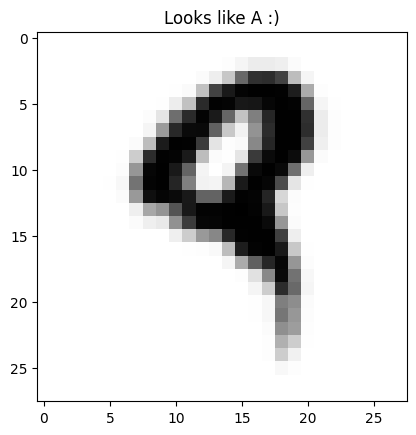

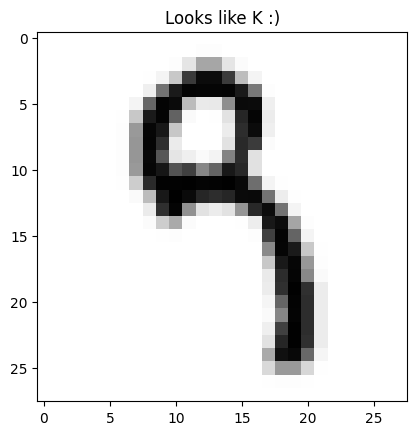

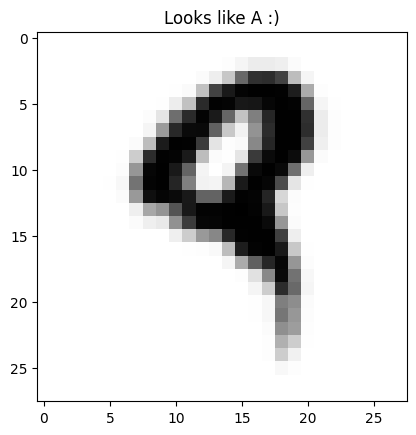

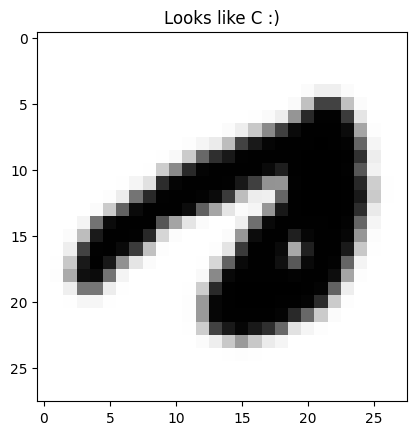

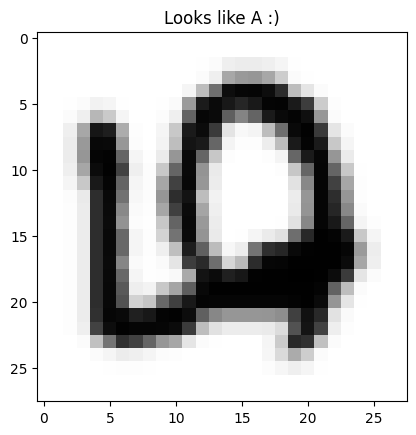

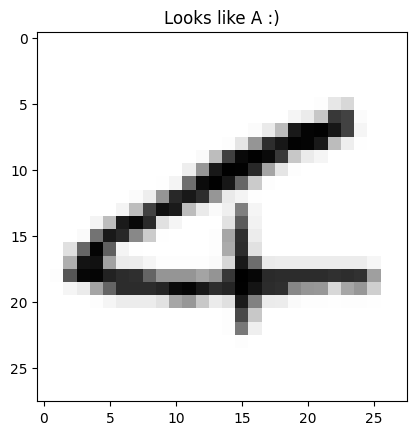

ValueError: invalid literal for int() with base 10: ''

In [72]:
# Show results
while True:
    index = int(input("Enter a number (0 - 14798): "))
    img = test_images[index]
    plt.imshow(img.reshape(28, 28), cmap="Greys")
    ##  ## 
    img = img.reshape(-1,1)
    # Forward propagation input -> hidden
    # Forward propagation
    h1_pre = b_i_h1 + w_i_h1.dot(img)
    h1 = 1 / (1 + np.exp(-h1_pre))
    
    h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
    h2 = 1 / (1 + np.exp(-h2_pre))
    
    o_pre = b_h2_o + w_h2_o.dot(h2)
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"Looks like {letter_dict[o.argmax()]} :)")
    plt.show()